# Import required packages

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

# Exercise 1

In [2]:
a_list = [0,1,2,3,4,5]
b_list = a_list[1:4]
print('a before: \n {}'.format(a_list))
print('b before: \n {}'.format(b_list))
b_list[0] = 1000
print('a after: \n {}'.format(a_list))
print('b after: \n {}'.format(b_list))

a before: 
 [0, 1, 2, 3, 4, 5]
b before: 
 [1, 2, 3]
a after: 
 [0, 1, 2, 3, 4, 5]
b after: 
 [1000, 2, 3]


In [3]:
a_array = np.array(a_list)
b_array = a_array[1:4]
print('a before: \n {}'.format(a_array))
print('b before: \n {}'.format(b_array))
b_array[0] = 1000
print('a after: \n {}'.format(a_array))
print('b after: \n {}'.format(b_array))

a before: 
 [0 1 2 3 4 5]
b before: 
 [1 2 3]
a after: 
 [   0 1000    2    3    4    5]
b after: 
 [1000    2    3]


In [4]:
a_array = np.array(a_list)
b_array = np.array(list(a_array))
print('a before: \n {}'.format(a_array))
print('b before: \n {}'.format(b_array))
b_array[0] = 1000
print('a after: \n {}'.format(a_array))
print('b after: \n {}'.format(b_array))

a before: 
 [0 1 2 3 4 5]
b before: 
 [0 1 2 3 4 5]
a after: 
 [0 1 2 3 4 5]
b after: 
 [1000    1    2    3    4    5]


# Exercise 2

In [5]:
n = 3
x = np.arange(1,n)
x.reshape(-1,2)
print('Array x: \n {} \n \n Shape of x: {}'.format(x,x.shape))


Array x: 
 [1 2] 
 
 Shape of x: (2,)


# Exercise 3

In [6]:
a = np.array([0,1,2])
b = np.array([3,0,0])
c = np.dot(a,b)
d = np.linalg.norm(a)*np.linalg.norm(b)
e = np.arccos(c/d)
f = e == np.pi/2
f

True

# Exercise 4 - Linear Regression Exercise

## Simulation of mock data 

Suppose the independent variable $x$ and the response variable $y$ follow a linear relationship, i.e.:

$$ y  = \mathbf{\beta}^\top \cdot \mathbf{x} = \beta_0 + \beta_1 x$$

where

$$
\mathbf{\beta}
=
\begin{bmatrix} 
\beta_0 \\
\beta_1
\end{bmatrix} 
\text{     and,    } 
\mathbf{x}
=
\begin{bmatrix} 
1 \\
x
\end{bmatrix} 
$$


$\beta_0$ is the intercept term and $\beta_1$ is the slope term.

We want to create some mock data $(X,Y)$ of $N=1000$ data points with certain amount of Gaussian noise $\epsilon \sim \mathcal{N} (0,1) $.


Where 

$$
X
=
\begin{bmatrix}
\mathbf{x_1}, 
\mathbf{x_2}, 
\cdots,
\mathbf{x_N}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1& & 1\\
& &\cdots &\\
x_1 & x_2& & x_N
\end{bmatrix}
\text{         and ,     }
Y
=
\begin{bmatrix}
y_1,
y_2,
\cdots,
y_N
\end{bmatrix}
$$




and

$$ y_i = \mathbf{\beta}^\top \cdot \mathbf{x}_i + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i $$ for $i=1 \ldots N$


Let's assume $\beta_0 = 3$ and $\beta_1 = 10$.

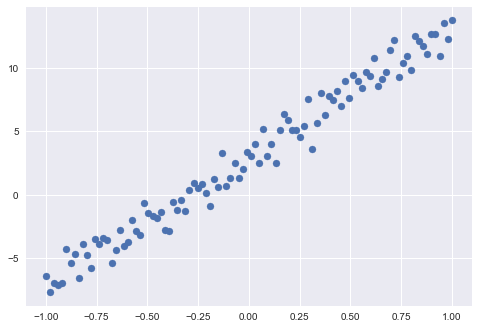

In [7]:
N = 100 #sample size

true_beta = np.array([3,10])
x = np.linspace(-1,1, N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x,y)


## Linear Regression

Suppose that we know $x$ and $y$ follow a linear relationship, but we do not know the value of $\mathbf{\beta}$. 
We want to build a linear model $f(\mathbf{x}; \beta)$ and estimate the value of $\mathbf{\beta}$ from data samples $(x_i,y_i)$, so that given any input $\mathbf{x}_i$, we can make a prediction $\hat{y_i}$:


$$ \hat{y_i} = f(\mathbf{x}_i; \beta) = \mathbf{\beta}^\top \cdot \mathbf{x}_i  = \beta_0 + \beta_1 x_i  $$




Define the mean squared error loss function which measure the error between our predictions and the actual values:

$$ l = \frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y_i})^2 $$

We can estimate the value of $\beta$ by finding the minimizer which minimizes $l$ using the Newton-Raphson algorithm.

$$
\mathbf{\hat{\beta}}
=
\text{argmin}_\beta \   l(\beta)
$$

## Gradient and Hessian

To use the Newton-Raphson algorithm, we need to calculate the gradient and Hessian of the loss function, which are the first order and second order partial derivatives of the loss function respectively.

### The first order partial derivatives of the loss function are:

$$
\begin{align}
\frac{\partial l}{\partial \beta_0} &= -\frac{2}{N} \sum_{i=1}^N (y_i-\hat{y_i}) \\
\frac{\partial l}{\partial \beta_1} &= -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i-\hat{y_i}) 
\end{align}
$$

### The gradient of the loss function is: 

$$
\nabla l
=
\begin{bmatrix} 
\frac{\partial l}{\partial \beta_0} \\ 
\frac{\partial l}{\partial \beta_1}
\end{bmatrix}
= 
-2 \cdot
\begin{bmatrix} 
\frac{1}{N} \sum_{i=1}^N (y_i -\hat{y_i}) \\ 
\frac{1}{N} \sum_{i=1}^N x_i \cdot (y_i -\hat{y_i})
\end{bmatrix}
$$

### The second order partial derivatives of the loss function are:

$$ 
\begin{align}
\frac{\partial^2 l}{\partial \beta_0^2} &= 2 \\
\frac{\partial^2 l}{\partial \beta_1^2} &=  \frac{2}{N} \sum_{i=1}^N x_i^2 \\
\frac{\partial^2 l}{\partial \beta_0 \partial \beta_1}  
&=  
\frac{\partial^2 l}{\partial \beta_1 \partial \beta_0}
=
\frac{2}{N} \sum_{i=1}^N x_i 
\end{align}
$$

### The Hessian of the loss function is: 

$$ 
H 
= 
\begin{bmatrix} 
\frac{\partial^2 l}{\partial \beta_0^2} & \frac{\partial^2 l}{\partial \beta_0 \partial \beta_1} \\ \frac{\partial^2 l}{\partial \beta_1 \partial \beta_0} & \frac{\partial^2 l}{\partial \beta_1^2} 
\end{bmatrix} 
= 
2 \cdot
\begin{bmatrix}
1 & \frac{1}{N} \sum_{i=1}^N x_i \\
\frac{1}{N} \sum_{i=1}^N x_i & \frac{1}{N} \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

## Newton-Raphson Algorithm (2nd Order Optimization)








Define the functions for our linear model and the loss function

In [8]:
# Define the function for our linear model
def model(param,x1):
    return np.array(np.matmul(param,x1))

# Define the function for our loss function
def loss_func(param, x1, y):
    yhat = model(param, x1)
    add = 0
    x = y-yhat
    for i in range(len(x)):
        x[i] = x[i]**2
    return np.sum(x)/x.shape[0]

In [9]:
x = np.array([1,2,2.5])
x1 = np.vstack([np.ones(x.shape), x])
beta = np.array([3,10])
y = np.array([3,2,3])
loss_func(beta, x1, y)
print(beta)

[ 3 10]


Newton-Raphson algorithm:

1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - H^{-1} \mathbf{\nabla} l(\beta_k) $$
     
     
3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 


Hint:
1. You can use np.abs(delta) to compute the absolute value of delta


In [30]:
def hessian(x):
    a = np.mean(x)
    t = []
    for i in x:
        t.append(i**2)
    b = np.mean(np.array(t))
    return np.array([[2,2*a],[2*a,2*b]])
def lossgradient(beta, x1):
    yhat = model(beta, x1)
    o = y-yhat
    a = np.sum(o)/o.shape[0]
    g = np.ones(o.shape)
    for i in range(len(g)):
        g[i] = x1[1][i]*o[i]
    b = np.sum(g)/g.shape[0]
    return np.array([[-2*a],[-2*b]])

The estimated value for beta is: [ 2.86049595 10.09510569]
The true value for beta is: [ 3 10]


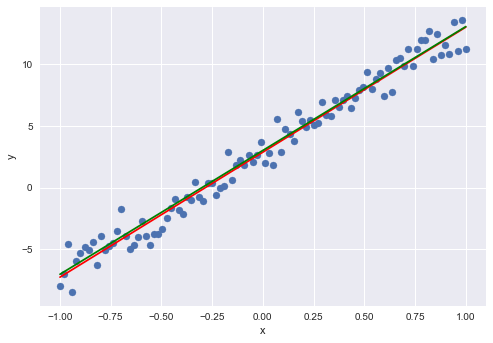

In [8]:
beta = np.random.normal(100,1,2) #initialize beta
tol = 1e-14 #tolerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
betalist = [beta]
while delta > tol:
    delta_beta = np.transpose(np.matmul(np.linalg.inv(hessian(x)), lossgradient(betalist[-1], x1)))
    new_beta=betalist[-1]-delta_beta
    betalist.append(new_beta)
    loss1 = loss_func(betalist[-1],x1,y)
    loss2 = loss_func(betalist[-2],x1,y)
    delta = np.abs(loss1-loss2)
new_beta = new_beta[0]
        
print('The estimated value for beta is:', new_beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(new_beta,x1)
y_pred1 = np.matmul(true_beta,x1)
x = x.reshape(y_pred.shape)
plt.plot(x, y_pred, 'r')
plt.plot(x, y_pred1, 'g')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Visualizing the result

The estimated value for beta is: [ 2.92857143 -0.14285714]
The true value for beta is: [ 3 10]


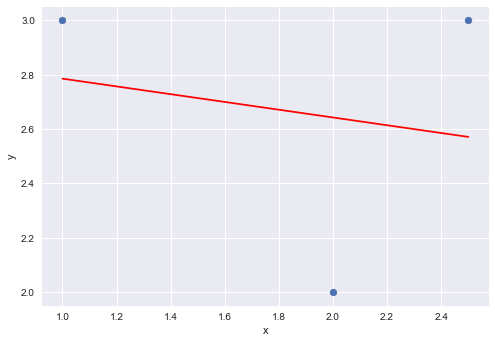

In [12]:
print('The estimated value for beta is:', new_beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(betalist[2][0],x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Gradient Descent Algorithm (1st Order Optimization) [Optional Exercise]

Gradient descent algorithm:


1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - \alpha \mathbf{\nabla} l(\beta_k) $$
   where $\alpha \sim 10^{-1}$ is the step size



3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 



The Gradient Descent estimated value for beta is: [ 3.0485746  -5.25961902]
The true value for beta is: [ 3 10]


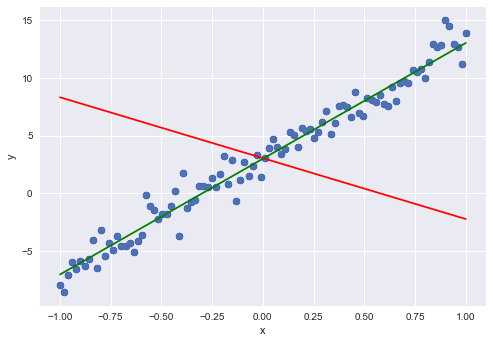

In [10]:
"""
Importing packages
"""
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

"""
Defining values
"""
debug = False
betalistshort = True
beta = np.random.normal(0,1,2) #initialize beta
alpha = 0.001
tol = 1e-7 #tolerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
betalist = [beta]
count = 1e3
c=0



"""
Defining functions
"""
# Define the function for our linear model
def model(param,x1):
    return np.array(np.matmul(param,x1))

# Define the function for our loss function
def loss_func(param, x1, y):
    yhat = model(param, x1)
    add = 0
    x = y-yhat
    for i in range(len(x)):
        x[i] = x[i]**2
    return np.sum(x)/x.shape[0]

def hessian(x):
    a = np.mean(x)
    t = []
    for i in x:
        t.append(i**2)
    b = np.mean(np.array(t))
    return np.array([[2,2*a],[2*a,2*b]])
def lossgradient(beta, x1):
    yhat = model(beta, x1)
    o = y-yhat
    a = np.sum(o)/o.shape[0]
    g = np.ones(o.shape)
    for i in range(len(g)):
        g[i] = x1[1][i]*o[i]
    b = np.sum(g)/g.shape[0]
    return np.array([[-2*a],[-2*b]])
"""
Sample initializer
"""
N = 100 #sample size

true_beta = np.array([3,10])
x = np.linspace(-1,1, N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x,y,c='b')






"""
Gradient Descent algorithm
"""
while delta > tol:
    
    delta_beta = np.transpose(alpha*lossgradient(betalist[-1], x1))
    new_beta=betalist[-1]-delta_beta
    betalist.append(new_beta)
    loss1 = loss_func(betalist[-1],x1,y)
    loss2 = loss_func(betalist[-2],x1,y)
    delta = np.abs(loss1-loss2)
    c += 1
    if count < c: break
if count < c: raise RuntimeError('Loop ran for too long')
new_beta = new_beta[0]







"""
Visualizing results
"""
print('The Gradient Descent estimated value for beta is:', new_beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(new_beta,x1)
y_pred1 = np.matmul(true_beta,x1)
x = x.reshape(y_pred.shape)
plt.plot(x, y_pred, 'r')
plt.plot(x, y_pred1, 'g')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [ ]:
beta = np.random.normal(100,1,2) #initialize beta
tol = 1e-14 #tolerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
betalist = [beta]
while delta > tol:
    delta_beta = np.transpose(np.matmul(np.linalg.inv(hessian(x)), lossgradient(betalist[-1], x1)))
    NewBeta=betalist[-1]-delta_beta
    betalist.append(NewBeta)
    loss1 = loss_func(betalist[-1],x1,y)
    loss2 = loss_func(betalist[-2],x1,y)
    delta = np.abs(loss1-loss2)
NewBeta = NewBeta[0]
        
print('The estimated value for beta is:', NewBeta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(NewBeta,x1)
y_pred1 = np.matmul(true_beta,x1)
x = x.reshape(y_pred.shape)
plt.plot(x, y_pred, 'r')
plt.plot(x, y_pred1, 'g')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Visualizing the result

The estimated value for beta is: [ 3.05324249 -4.00079235]
The true value for beta is: [ 3 10]


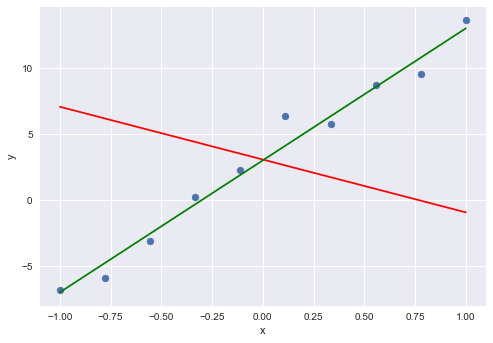

In [423]:
print('The estimated value for beta is:', new_beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(new_beta,x1)
y_pred1 = np.matmul(true_beta,x1)
x = x.reshape(y_pred.shape)
plt.plot(x, y_pred, 'r')
plt.plot(x, y_pred1, 'g')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

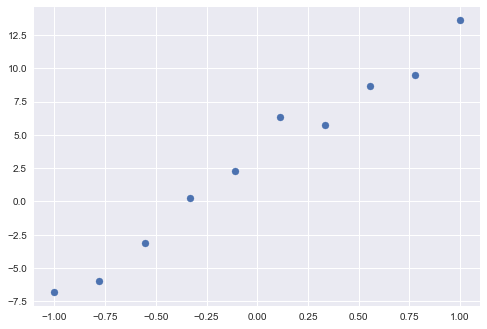

In [380]:
N = 10 #sample size

true_beta = np.array([3,10])
x = np.linspace(-1,1, N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x,y)


In [26]:
raise RuntimeError('Corgi')

RuntimeError: Corgi